# Proyek Analisis Data: [Data E-commerce]
- **Nama:** Ari Kurniawan
- **Email:** kurniawanari226@gmail.com

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola pembelian pelanggan?

     - Tujuan: Memahami produk yang paling sering dibeli, kategori produk populer, dan waktu puncak pembelian.
     - Data yang dibutuhkan:
        - df_order.csv (untuk waktu dan ID pesanan)
        - df_orderItem.csv (untuk rincian produk per pesanan)
        - df_product.csv (untuk informasi kategori produk)


2. Produk apa saja yang memberikan keuntungan tertinggi?
      - Tujuan: Mengidentifikasi produk atau kategori dengan kontribusi pendapatan terbesar.
      - Data yang dibutuhkan:
        - df_orderItem.csv (untuk rincian harga dan jumlah produk yang terjual)
        - df_product.csv (untuk kategori produk)
        - df_orderPay.csv (untuk metode pembayaran yang digunakan pelanggan, jika ingin melihat dampaknya terhadap penjualan)

3. Wilayah Mana saja yang memiliki tingkat penjualan tertinggi?
      - Tujuan : Mengidentifikasi wilayah mana saja yang memiliki potensi besar berdasarkan banyaknya penjualan.

4. RFM Analisis
      - Tujuan : Untuk melihat seberapa banyak pelanggan yang memiliki value yang tinggi dengan memahami pelanggan berdasarkan RFM / Recency Frekuensi Monetary


## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [83]:
url_cust = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/main/customers_dataset.csv'
url_geo = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/geolocation_dataset.csv'
url_orderItem = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/order_items_dataset.csv'
url_orderPay = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/order_payments_dataset.csv'
url_orderReview = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/order_reviews_dataset.csv'
url_order = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/orders_dataset.csv?'
url_product = 'https://raw.githubusercontent.com/arikrnwn69/DataFrame/refs/heads/main/products_dataset.csv'

In [84]:
df_cust = pd.read_csv(url_cust)
df_geo = pd.read_csv(url_geo)
df_orderItem = pd.read_csv(url_orderItem)
df_order = pd.read_csv(url_order)
df_product = pd.read_csv(url_product)
df_orderPay = pd.read_csv(url_orderPay)

In [85]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [86]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- xxx
- xxx

### Assessing Data

<h3> 1. Data Order </h3>

Catatan :

- Terdapat nilai NaN pada beberapa variabel (v)
- Beberapa tipe data harus di ubah dari objek menjadi datetime (v)


In [87]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [88]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Melihat nilai yang terduplikasi

In [89]:
print(f"Nilai Duplikasi {df_order.duplicated().sum()}")

Nilai Duplikasi 0


**Melihat Nilai Null**

In [90]:
df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [91]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<h3> 2. Data Order Item </h3>

<b> Catatan : </b>
  - merubah tipe data pada variabel shipping limit date menjadi datetime (v)
  - Ada indikasi data outlier pada variabel price dan freight_value () / Opsi

In [92]:
df_orderItem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [93]:
df_orderItem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [94]:
df_orderItem.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [95]:
print(f'Nilai Duplikasi : {df_orderItem.duplicated().sum()}')

Nilai Duplikasi : 0


**Insight:**
- xxx
- xxx

<h3> 3. Product </h3>

<b> Catatan : </b>
  - Ada indikasi nilai NaN pada beberapa variabel, namun kemungkinan nilai null tersebut akan kita hilangkan dengan drop tabel karena variabel tersebut tidak teralu di perlukan.

In [96]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [97]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [98]:
df_product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [99]:
print(f'Nilai Duplikasi : {df_product.duplicated().sum()}')

Nilai Duplikasi : 0


<h3> 4. Data Order Pay </h3>

<b> Catatan : </b>

In [100]:
df_orderPay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [101]:
df_orderPay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [102]:
df_orderPay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [103]:
df_orderPay.duplicated().sum()

0

<h3> 5. Data Geologi </h3>

In [104]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [105]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [106]:
df_geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [107]:
print(f"Jumlah Duplikasi : {df_geo.duplicated().sum()}")

Jumlah Duplikasi : 261831


In [108]:
df_geo[df_geo.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


<h3> 6. Data Customer </h3>

In [109]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [110]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [111]:
df_cust.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [112]:
df_cust.duplicated().sum()

0

<b>Catatan : </b>

Pada data customer tidak ditemukan nilai null dan nilai duplikasi serta data tipe nya sudah benar jadi tidak perlu ada pembersihan lagi 

### Cleaning Data

<h3> 1. Data Order </h3>

In [113]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [114]:
datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in datetime :
  df_order[i] = pd.to_datetime(df_order[i])

In [115]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Menghapus Data outlier

In [116]:
df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [117]:
df_order['order_approved_at'].fillna(df_order['order_delivered_carrier_date'], inplace = True)
df_order['order_delivered_customer_date'].fillna(df_order['order_estimated_delivery_date'], inplace = True)
df_order['order_delivered_customer_date'].fillna(df_order['order_estimated_delivery_date'], inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2095938567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order['order_approved_at'].fillna(df_order['order_delivered_carrier_date'], inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2095938567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Mengambil data yang memiliki status pengiriman Delivered

In [118]:
df_order['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [119]:
delivered_order = df_order[df_order['order_status'] == 'delivered']
delivered_order.shape

(96478, 8)

<h3> 2. Data Order Item </h3>

In [120]:
df_orderItem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [121]:
df_orderItem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Mengubah tipe data shipping_limit_date menjadi datetime

In [122]:
df_orderItem['shipping_limit_date'] = pd.to_datetime(df_orderItem['shipping_limit_date'])

In [123]:
order_item = df_orderItem[['order_id','order_item_id', 'product_id', 'price']]
order_item.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


<h3> 3. Data Product </h3>

In [124]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [125]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [126]:
product_category = df_product[['product_id', 'product_category_name']]

In [127]:
product_category['product_category_name'].fillna('Unknown', inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2959410082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_category['product_category_name'].fillna('Unknown', inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2959410082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_category['product_category_name'].filln

<h3> 4. Data Order Pay </h3>

In [128]:
df_orderPay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [129]:
df_orderPay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [130]:
order_pay = df_orderPay[['order_id','payment_type', 'payment_sequential']]
order_pay.head()

,order_id,payment_type,payment_sequential
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,1
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,credit_card,1
4,42fdf880ba16b47b59251dd489d4441a,credit_card,1


<h3> 5. Data Geologi </h3>

In [131]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [132]:
df_geo.drop_duplicates(inplace = True)

In [133]:
df_geo.duplicated().sum()

0

In [134]:
df_geo.shape

(738332, 5)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

## **1. Pertanyaan Pertama**

Memulai untuk menggabungkan data delivered_order, order_item, product_category

In [135]:
print(delivered_order.shape)
print(order_item.shape)
print(product_category.shape)

(96478, 8)
(112650, 4)
(32951, 2)


In [136]:
product_category.sample(5)

,product_id,product_category_name
349,63f7cd79973145c9e6bb11c5fd03e82e,fashion_bolsas_e_acessorios
29151,30916403a2996c146b5598774d657c55,fashion_bolsas_e_acessorios
24018,2a209ce7ce3ea3a21cc0b4c36495e9df,eletrodomesticos
20864,c095f03868efc3263075c4ad20641211,beleza_saude
13346,6639a238ead6779d6ef0b3eea56f9f86,fashion_bolsas_e_acessorios


In [137]:
delivered_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [138]:
order_item.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


Kita akan jadikan order_item sebagai pusat atau ***primary table***

In [139]:
df_buyer = pd.merge(order_item, product_category, on = 'product_id', how = 'left')
df_buyer = pd.merge(df_buyer, delivered_order, on = 'order_id', how = 'left')

In [140]:
df_buyer.head()

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [141]:
df_buyer['product_category_name'].fillna('Unknown', inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2610913403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_buyer['product_category_name'].fillna('Unknown', inplace = True)


In [142]:
df_buyer.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
product_category_name               0
customer_id                      2453
order_status                     2453
order_purchase_timestamp         2453
order_approved_at                2453
order_delivered_carrier_date     2455
order_delivered_customer_date    2453
order_estimated_delivery_date    2453
dtype: int64

In [143]:
df_buyer.dropna(inplace = True)

In [144]:
df_buyer.shape

(110195, 12)

In [145]:
df_buyer.shape

(110195, 12)

#### A. Mengetahui product apa yang paling populer bedasarkan product_id

In [146]:
df_buyer.sample()

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5815,0d21189c5494d8288ee358b3b24f85b4,1,41347179516c8b9380040cf54274ff80,234.9,informatica_acessorios,c0464fc43033013d56d9ea076ccf6065,delivered,2017-07-12 10:36:01,2017-07-13 03:05:23,2017-07-14 17:45:44,2017-07-26 10:39:52,2017-08-03


In [147]:
df_buyer.columns

Index(['order_id', 'order_item_id', 'product_id', 'price',
       'product_category_name', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [148]:
populer_product = df_buyer.groupby(by = 'product_category_name').agg({
    'product_id' : 'count'})\
    .rename(columns = {'product_id' : 'Jumlah Pemesanan'}).sort_values(by = 'Jumlah Pemesanan', ascending = False)

populer_product

,Jumlah Pemesanan
product_category_name,
cama_mesa_banho,10953
beleza_saude,9465
esporte_lazer,8430
moveis_decoracao,8159
informatica_acessorios,7644
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,8


In [149]:
print(df_buyer['product_category_name'].value_counts())

product_category_name
cama_mesa_banho                  10953
beleza_saude                      9465
esporte_lazer                     8430
moveis_decoracao                  8159
informatica_acessorios            7644
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             8
fashion_roupa_infanto_juvenil        7
seguros_e_servicos                   2
Name: count, Length: 74, dtype: int64


### B. Mengetahui product apa yang memiliki pembelian tertinggi berdasarkan frekuensi pembelian pada product_id

In [150]:
freq_buyer = df_buyer.groupby(['product_category_name', 'product_id'])\
  .size().reset_index(name = 'Frekuensi Pembelian').sort_values(by = 'Frekuensi Pembelian', ascending = False)

freq_buyer

,product_category_name,product_id,Frekuensi Pembelian
23481,moveis_decoracao,aca2eb7d00ea1a7b8ebd4e68314663af,520
18312,ferramentas_jardim,422879e10f46682990de24d770e7f83d,484
9469,cama_mesa_banho,99a4788cb24856965c36a24e339b6058,477
18281,ferramentas_jardim,389d119b48cf3043d311335e499d9c6b,390
18270,ferramentas_jardim,368c6c730842d78016ad823897a372db,388
...,...,...,...
13792,eletronicos,d426c52017387e708aa9e72eb90797b2,1
13791,eletronicos,d3cf7fe35b7cc7ebaa5609b58b469d2f,1
13790,eletronicos,d34ffc1c0b0efc09550c49be7eb7896e,1
13789,eletronicos,d335945072dbe4531d77c761f7eb6324,1


In [151]:
df_buyer[df_buyer['product_id'] == '8cab8abac59158715e0d70a36c807415']

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,99.9,esporte_lazer,2a30c97668e81df7c17a8b14447aeeba,delivered,2018-08-14 20:43:09,2018-08-15 12:15:10,2018-08-15 15:28:00,2018-08-22 12:02:27,2018-08-28
17477,28116a9f673362aaa7a4349192ad5e61,1,8cab8abac59158715e0d70a36c807415,99.9,esporte_lazer,1915e15858cfdff3c6e7417640ebc5ea,delivered,2017-05-24 12:17:36,2017-05-24 12:31:06,2017-05-25 09:41:27,2017-06-01 12:33:30,2017-06-16


### C. Waktu puncak pembelian

Kita akan mengambil variabel order_purchase_timestamp untuk melihat diwaktu apa pemesanan banyak dilakukan. Kita akan mengklasifikasikan berdasarkan bulan dan tanggal.

In [152]:
retensi_pembelian = df_buyer.copy()

In [153]:
retensi_pembelian['order_purchase_month'] = retensi_pembelian['order_purchase_timestamp'].dt.month
retensi_pembelian['order_purchase_day'] = retensi_pembelian['order_purchase_timestamp'].dt.day

In [154]:
retensi_pembelian.columns

Index(['order_id', 'order_item_id', 'product_id', 'price',
       'product_category_name', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_purchase_month',
       'order_purchase_day'],
      dtype='object')

In [155]:
retensi_pembelian.head()

,order_id,order_item_id,product_id,price,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,9,13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,4,26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,8,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2,4


In [156]:
retensi_pembelian.describe()

,order_item_id,price,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_day
count,110195.000000,110195.000000,110195,110195,110195,110195,110195,110195.000000,110195.000000
mean,1.198185,119.979492,2018-01-02 02:53:59.607849728,2018-01-02 13:25:55.495149568,2018-01-05 09:42:32.069540352,2018-01-14 14:14:29.055293184,2018-01-25 22:11:44.808748032,6.031617,15.562140
min,1.000000,0.850000,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,1.000000
25%,1.000000,39.900000,2017-09-15 06:56:38,2017-09-15 14:00:15.500000,2017-09-18 22:26:15.500000,2017-09-26 20:17:01.500000,2017-10-06 00:00:00,3.000000,8.000000
50%,1.000000,74.900000,2018-01-21 10:13:10,2018-01-22 13:56:45,2018-01-24 18:52:54,2018-02-02 21:08:40,2018-02-16 00:00:00,6.000000,16.000000
75%,1.000000,134.170000,2018-05-05 16:04:51.500000,2018-05-05 23:01:51,2018-05-08 14:20:30,2018-05-15 20:29:08.500000,2018-05-28 00:00:00,8.000000,23.000000
max,21.000000,6735.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,12.000000,31.000000
std,0.706682,182.300927,NaN,NaN,NaN,NaN,NaN,3.230698,8.665835


In [157]:
retensi_pembelian.describe()

,order_item_id,price,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_day
count,110195.000000,110195.000000,110195,110195,110195,110195,110195,110195.000000,110195.000000
mean,1.198185,119.979492,2018-01-02 02:53:59.607849728,2018-01-02 13:25:55.495149568,2018-01-05 09:42:32.069540352,2018-01-14 14:14:29.055293184,2018-01-25 22:11:44.808748032,6.031617,15.562140
min,1.000000,0.850000,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,1.000000
25%,1.000000,39.900000,2017-09-15 06:56:38,2017-09-15 14:00:15.500000,2017-09-18 22:26:15.500000,2017-09-26 20:17:01.500000,2017-10-06 00:00:00,3.000000,8.000000
50%,1.000000,74.900000,2018-01-21 10:13:10,2018-01-22 13:56:45,2018-01-24 18:52:54,2018-02-02 21:08:40,2018-02-16 00:00:00,6.000000,16.000000
75%,1.000000,134.170000,2018-05-05 16:04:51.500000,2018-05-05 23:01:51,2018-05-08 14:20:30,2018-05-15 20:29:08.500000,2018-05-28 00:00:00,8.000000,23.000000
max,21.000000,6735.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,12.000000,31.000000
std,0.706682,182.300927,NaN,NaN,NaN,NaN,NaN,3.230698,8.665835


Mountly Trend

In [158]:
mountly_trend = retensi_pembelian.groupby(by='order_purchase_month').agg({
    'order_id': 'count'  # Menghitung jumlah order_id untuk setiap bulan
}).reset_index().rename(columns={'order_id': 'Purchase Counts'})

mountly_trend

,order_purchase_month,Purchase Counts
0,1,8950
1,2,9376
2,3,10914
3,4,10396
4,5,11813
5,6,10499
6,7,11379
7,8,11939
8,9,4739
9,10,5527


## **2. Pertanyaan kedua**

Mengidentifikasi Produk dan Kategori dengan kontribusi pendapatan terbesar

In [159]:
order_item.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [160]:
product_category.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [161]:
print(order_item.shape)
print(product_category.shape)
print(order_pay.shape)

(112650, 4)
(32951, 2)
(103886, 3)


In [162]:
order_pay.head()

,order_id,payment_type,payment_sequential
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,1
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,credit_card,1
4,42fdf880ba16b47b59251dd489d4441a,credit_card,1


Menggabungkan antara order_item, product_category, dan order_pay

In [163]:
data_profit = pd.merge(order_item, product_category, on = "product_id", how = 'left')
data_profit = pd.merge(data_profit, order_pay, on = 'order_id', how = 'left')

In [164]:
data_profit['payment_type'].fillna('credit_card', inplace = True)
data_profit['payment_sequential'].fillna(1, inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\3216846344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_profit['payment_type'].fillna('credit_card', inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\3216846344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [165]:
data_profit.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
price                    0
product_category_name    0
payment_type             0
payment_sequential       0
dtype: int64

In [166]:
data_profit[data_profit['payment_type'].isnull()]

,order_id,order_item_id,product_id,price,product_category_name,payment_type,payment_sequential


In [167]:
data_profit['payment_type'].value_counts(ascending = False)

payment_type
credit_card    86772
boleto         22867
voucher         6274
debit_card      1691
Name: count, dtype: int64

In [168]:
data_profit.describe()

,order_item_id,price,payment_sequential
count,117604.000000,117604.000000,117604.000000
mean,1.195920,120.822849,1.093526
std,0.697721,184.477367,0.726682
min,1.000000,0.850000,1.000000
25%,1.000000,39.900000,1.000000
50%,1.000000,74.900000,1.000000
75%,1.000000,134.900000,1.000000
max,21.000000,6735.000000,29.000000


Mengklasifikasikan keuntungan / profit dengan menghitung pesanan yang telah selesai berdasarkan product_id

In [169]:
profit_product = data_profit.groupby(by='product_category_name').agg({
    'product_id': 'count',
    'price': 'sum'
}).reset_index().rename(columns={'product_id': 'Jumlah Produk', 'price': 'Total Profit'}).sort_values(by = 'Total Profit', ascending = False)

profit_product

,product_category_name,Jumlah Produk,Total Profit
12,beleza_saude,9975,1297490.77
67,relogios_presentes,6201,1253143.30
14,cama_mesa_banho,11823,1092551.02
33,esporte_lazer,8945,1023996.34
45,informatica_acessorios,8082,942277.57
...,...,...,...
42,flores,33,1110.04
16,casa_conforto_2,31,773.17
18,cds_dvds_musicais,14,730.00
38,fashion_roupa_infanto_juvenil,8,569.85


## **3. Pertanyaan Ketiga**

Wilayah mana yang memiliki potensi pelanggan berdasarkan jumlah order

In [170]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [171]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [172]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Kita akan coba menggabungkan antara data df_geo dengan data df_order

In [173]:
# cust_geo = df_order.merge(df_cust, on = 'customer_id', how = 'left')
# cust_geo = cust_geo[cust_geo['order_status'] == 'delivered']
# cust_geo.drop(columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

cust_order = pd.merge(df_order, df_cust, on = 'customer_id', how = 'inner')
cust_geo = pd.merge(
    cust_order,
    df_geo,
    left_on = 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix',
    how = 'inner'
)
cust_geo.drop(columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace = True)
cust_geo.head()

,order_id,customer_id,order_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.575033,-46.587451,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.580054,-46.586673,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.576281,-46.587276,sao paulo,SP


Kita akan membuat data order city

In [174]:
cust_city = cust_geo.groupby(['geolocation_city', 'geolocation_lat', 'geolocation_lng'])['order_id'].count().reset_index()
cust_city.rename(columns={'order_id': 'order_count'}, inplace=True)
cust_city.sort_values(by='order_count', ascending=False, inplace=True)

In [175]:
cust_city.geolocation_city.sort_values(ascending = False)

710308                   óleo
710305                   óleo
710306                   óleo
710307                   óleo
710304          érico cardoso
                 ...         
4         abadia dos dourados
14        abadia dos dourados
19        abadia dos dourados
1          ...arraial do cabo
0                    * cidade
Name: geolocation_city, Length: 710309, dtype: object

In [176]:
cust_city.sample(10)

,geolocation_city,geolocation_lat,geolocation_lng,order_count
109102,campo grande,-20.502167,-54.580974,12
653399,são paulo,-23.569972,-46.626617,4
315448,maringa,-23.423982,-51.923764,17
333448,montes claros,-16.722365,-43.870503,71
349090,nova iguacu,-22.726398,-43.531097,5
155641,cruzeiro,-22.568915,-44.960804,6
55183,belo horizonte,-19.931244,-43.932318,65
519416,sao fidelis,-21.651907,-41.743844,23
651051,são paulo,-23.594517,-46.687684,16
704437,vitoria da conquista,-14.883407,-40.827463,5


In [177]:
cust_city_groupby = cust_city.groupby(by = 'geolocation_city').agg({
    'order_count' : 'sum',
    'geolocation_lat' : 'mean',
    'geolocation_lng' : 'mean'
}).reset_index().sort_values(by = 'order_count', ascending = False)

In [178]:
cust_city_groupby[0:20]

,geolocation_city,order_count,geolocation_lat,geolocation_lng
4305,rio de janeiro,940421,-22.906193,-43.334183
4870,sao paulo,604746,-23.570708,-46.624906
606,belo horizonte,462221,-19.905202,-43.959321
1536,curitiba,161197,-25.455394,-49.273056
3392,niteroi,158741,-22.897993,-43.084371
5246,são paulo,157256,-23.573523,-46.633468
4038,porto alegre,141824,-30.050021,-51.186896
4684,santos,134971,-23.961266,-46.327999
5545,uberlandia,127034,-18.918000,-48.275147
948,campinas,125935,-22.901484,-47.071187


**Kesimpulan** :

Berdasarkan data diatas kota dengan jumlah order terbanyak berdasarkan order_id adalah kota <b>Rio de Jainero </b> dengan jumlah order 940421	pada posisi pertama lalu diikuti oleh kota <b>sao paulo</b> dengan 604746 dan <b>belo horizonte</b> dengan 462221


**Insight:**
- xxx
- xxx

## **4. RFM Analisis**

In [179]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [180]:
df_buyer.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
price                            0
product_category_name            0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Kita seleksi dulu data data apa saja yang kemungkinan akan kita gunakan

In [181]:
df_buyer_select = df_buyer[['order_id', 'product_id', 'price', 'customer_id', 'order_purchase_timestamp']]
df_cust_select = df_cust[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city']]

In [182]:
df_cust['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

Kita gabungkan dari data yang sudah kita seleksi tadi

In [183]:
df_rfm = df_cust_select.merge(df_buyer_select, on = 'customer_id', how = 'left')

df_rfm.customer_unique_id.value_counts()

customer_unique_id
c8460e4251689ba205045f3ea17884a1    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
698e1cf81d01a3d389d96145f7fa6df8    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
                                    ..
3ead509e5493be32f2055acf8c155653     1
105761d95a7439fca09ab5f4c5f535b8     1
63e7b3101c55297369f3141cf91532be     1
abd0b383c8be738ec0146766eb348336     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

In [184]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113160 entries, 0 to 113159
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               113160 non-null  object        
 1   customer_unique_id        113160 non-null  object        
 2   customer_zip_code_prefix  113160 non-null  int64         
 3   customer_city             113160 non-null  object        
 4   order_id                  110195 non-null  object        
 5   product_id                110195 non-null  object        
 6   price                     110195 non-null  float64       
 7   order_purchase_timestamp  110195 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [185]:
df_rfm.dropna(inplace = True)

In [186]:
# df_rfm = df_rfm.groupby(by = 'customer_unique_id', as_index = False).agg({
#     'order_id' : 'count',
#     'order_purchase_timestamp' : 'max',
#     'price' : 'sum'
# }).reset_index().rename(columns = { 'order_id' : 'recency',
#                                     'order_purchase_timestamp' : 'monetary',
#                                     'price' : 'Total Pembelian'
# }).sort_values(by = 'Total Pembelian', ascending = False)

customer_rfm = df_rfm.groupby('customer_unique_id', as_index=False).agg({
    'order_id': 'count', # Frequency
    'order_purchase_timestamp': 'max', # Receny
    'price': 'sum' # Monetary
}).rename(columns={'order_id' : 'Jumlah Pemesanan', 'price': 'total_spending'})

customer_rfm = customer_rfm.sort_values(by='total_spending', ascending=False).reset_index(drop=True)

customer_rfm['spending_category'] = pd.qcut(
    customer_rfm['total_spending'],
    q=3,
    labels=['Low', 'Medium', 'High'])

In [187]:
customer_rfm.dropna(inplace = True)

Menghitung Kapan terakhir kali customer order

In [188]:
customer_rfm = customer_rfm.reset_index(drop = True)
customer_rfm.index +=1

In [189]:
customer_rfm['order_purchase_timestamp'] = pd.to_datetime(customer_rfm['order_purchase_timestamp'])

In [190]:
recently_order = customer_rfm['order_purchase_timestamp'].max()
customer_rfm['recency'] = customer_rfm['order_purchase_timestamp'].apply(lambda x : (recently_order - x).days)

Membuat Ranking / Scoring pada customer_rfm

In [191]:
customer_rfm.head()

,customer_unique_id,Jumlah Pemesanan,order_purchase_timestamp,total_spending,spending_category,recency
1,0a0a92112bd4c708ca5fde585afaa872,8,2017-09-29 15:24:52,13440.0,High,333
2,da122df9eeddfedc1dc1f5349a1a690c,2,2017-04-01 15:58:41,7388.0,High,514
3,763c8b1c9c68a0229c42c9fc6f662b93,4,2018-07-15 14:49:44,7160.0,High,45
4,dc4802a71eae9be1dd28f5d788ceb526,1,2017-02-12 20:37:36,6735.0,High,562
5,459bef486812aa25204be022145caa62,1,2018-07-25 18:10:17,6729.0,High,34


In [192]:
rank_rfm = customer_rfm[['customer_unique_id','Jumlah Pemesanan', 'total_spending', 'order_purchase_timestamp']]
rank_rfm.rename(columns = {'order_purchase_timestamp' : 'recency',
                          'Jumlah Pemesanan' : 'frekuensi',
                          'total_spending' : 'monetery'
}, inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2835251417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_rfm.rename(columns = {'order_purchase_timestamp' : 'recency',


In [193]:
rank_rfm['r_rank'] = rank_rfm['recency'].rank(ascending = False)
rank_rfm['f_rank'] = rank_rfm['frekuensi'].rank(ascending = True)
rank_rfm['m_rank'] = rank_rfm['monetery'].rank(ascending = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2941746873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_rfm['r_rank'] = rank_rfm['recency'].rank(ascending = False)


In [194]:
rank_rfm['r_rank_norm'] = (rank_rfm['r_rank'] / rank_rfm['r_rank'].max())*100
rank_rfm['f_rank_norm'] = (rank_rfm['f_rank'] / rank_rfm['f_rank'].max())*100
rank_rfm['m_rank_norm'] = (rank_rfm['m_rank'] / rank_rfm['m_rank'].max()) * 100

rank_rfm.head()

,customer_unique_id,frekuensi,monetery,recency,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm
1,0a0a92112bd4c708ca5fde585afaa872,8,13440.0,2017-09-29 15:24:52,68458.0,93294.5,93356.0,73.330048,99.934123,100.000000
2,da122df9eeddfedc1dc1f5349a1a690c,2,7388.0,2017-04-01 15:58:41,88375.0,86145.0,93355.0,94.664510,92.275804,99.998929
3,763c8b1c9c68a0229c42c9fc6f662b93,4,7160.0,2018-07-15 14:49:44,10184.0,92500.0,93354.0,10.908779,99.083080,99.997858
4,dc4802a71eae9be1dd28f5d788ceb526,1,6735.0,2017-02-12 20:37:36,91638.0,40873.5,93353.0,98.159733,43.782403,99.996786
5,459bef486812aa25204be022145caa62,1,6729.0,2018-07-25 18:10:17,7746.0,40873.5,93352.0,8.297271,43.782403,99.995715


In [195]:
rank_rfm.drop(columns = ['r_rank', 'm_rank', 'f_rank'], inplace = True)


**Menentukan Skor RFM**


Berdasarkan website geeksforgeeks.org rumus dari RFM adalah (0.15 * recency) + (0.28 * frekuensi) + (0.57 * monetery)

In [196]:
rank_rfm['RFM_Score'] = (0.15 * rank_rfm['r_rank_norm']) + (0.28 * rank_rfm['f_rank_norm']) + (0.57 * rank_rfm['m_rank_norm'])
rank_rfm['RFM_Score'] *= 0.05
rank_rfm["RFM_Score"].round(2)
rank_rfm.drop(columns = ['r_rank_norm', 'f_rank_norm', 'm_rank_norm'], inplace = True)


In [197]:
rank_rfm.shape

(93356, 5)

In [198]:
def customer_rank (score) :
  if score > 4.5 :
    return 'Pelanggan Teratas'
  elif 4.5 > score > 4 :
    return 'Pelanggan Bernilai Tinggi'
  elif 4 > score > 3 :
    return 'Pelanggan Bernilai Sedang'
  elif 3 > score > 1.6 :
    return 'Pelanggan Bernilai Rendah'
  else :
    return 'Pelanggan Bernilai Rendah'

rank_rfm['customer_segment'] = rank_rfm['RFM_Score'].apply(customer_rank)

In [199]:
rank_rfm

,customer_unique_id,frekuensi,monetery,recency,RFM_Score,customer_segment
1,0a0a92112bd4c708ca5fde585afaa872,8,13440.00,2017-09-29 15:24:52,4.799053,Pelanggan Teratas
2,da122df9eeddfedc1dc1f5349a1a690c,2,7388.00,2017-04-01 15:58:41,4.851815,Pelanggan Teratas
3,763c8b1c9c68a0229c42c9fc6f662b93,4,7160.00,2018-07-15 14:49:44,4.318918,Pelanggan Bernilai Tinggi
4,dc4802a71eae9be1dd28f5d788ceb526,1,6735.00,2017-02-12 20:37:36,4.199060,Pelanggan Bernilai Tinggi
5,459bef486812aa25204be022145caa62,1,6729.00,2018-07-25 18:10:17,3.525061,Pelanggan Bernilai Sedang
...,...,...,...,...,...,...
93352,cf3839da0d9492ad151690b65f45d800,1,2.99,2018-02-02 00:01:31,0.971067,Pelanggan Bernilai Rendah
93353,bd06ce0e06ad77a7f681f1a4960a3cc6,1,2.29,2017-09-13 19:13:20,1.179882,Pelanggan Bernilai Rendah
93354,317cfc692e3f86c45c95697c61c853a6,1,2.20,2018-08-25 21:20:50,0.614644,Pelanggan Bernilai Rendah
93355,b38211bd797f4fdd81a98b9d1754b606,1,0.85,2018-04-24 20:15:21,0.825018,Pelanggan Bernilai Rendah


membuat file grouping untuk segmentasi pelanggan

In [200]:
customer_segment = rank_rfm.groupby(by = 'customer_segment', as_index = False).customer_unique_id.nunique().sort_values(by = 'customer_unique_id',ascending = True)
customer_segment

,customer_segment,customer_unique_id
3,Pelanggan Teratas,934
2,Pelanggan Bernilai Tinggi,3993
1,Pelanggan Bernilai Sedang,25224
0,Pelanggan Bernilai Rendah,63205


<h3> Kesimpulan : </h3>

Pelanggan berdasarkan customer_unique_id dengan nilai rfm teratas ada sebanyak 934 pelanggan lalu bernilai tinggi ada 3993 unique id diikuti oleh pelanggan bernilai sedang ada di angka 25224 unique id lalu yang paling banyak ada pada Pelanggan bernilai rendah ada pada 63205 unique id


### Pertanyaan 1: Bagaimana Pola Pembelian Pelanggan

#### **A. Kategori product apa yang paling populer?**

In [201]:
populer_product.head()

,Jumlah Pemesanan
product_category_name,
cama_mesa_banho,10953
beleza_saude,9465
esporte_lazer,8430
moveis_decoracao,8159
informatica_acessorios,7644


In [202]:
df_buyer['product_category_name'].sort_values()

43498                   Unknown
109110                  Unknown
94983                   Unknown
57558                   Unknown
29106                   Unknown
                  ...          
70313     utilidades_domesticas
5539      utilidades_domesticas
70319     utilidades_domesticas
70334     utilidades_domesticas
56331     utilidades_domesticas
Name: product_category_name, Length: 110195, dtype: object

In [203]:
populer_product.head()

,Jumlah Pemesanan
product_category_name,
cama_mesa_banho,10953
beleza_saude,9465
esporte_lazer,8430
moveis_decoracao,8159
informatica_acessorios,7644


Text(0.5, 1.0, 'Jumlah Produk yang Terjual')

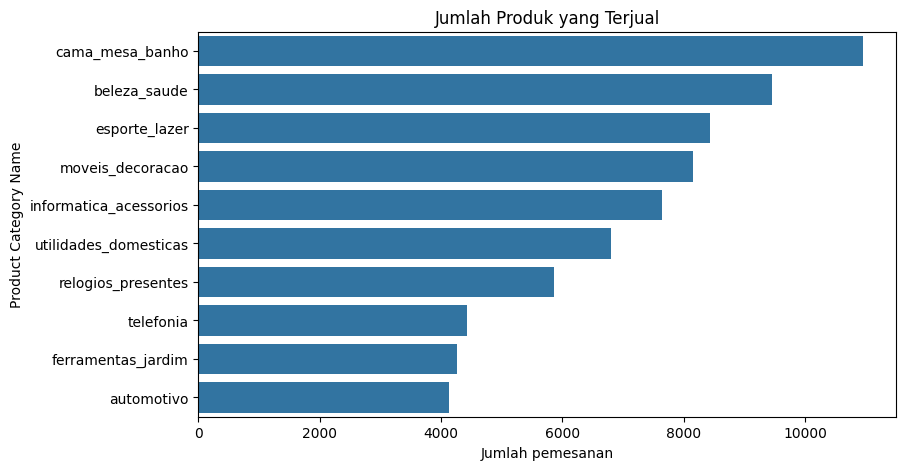

In [204]:
plt.figure(figsize = (9,5))
sns.barplot(x = 'Jumlah Pemesanan', y = 'product_category_name', data = populer_product[0:10])

plt.xlabel('Jumlah pemesanan')
plt.ylabel('Product Category Name')
plt.title('Jumlah Produk yang Terjual')

Barchart diatas merupakan visualisasi yang kita dapatkan terkait kategori product apa yang paling populer berdasarkan banyaknya pemesanan. Kita hanya mengabil 10 teratas dari 74 kategori product yang kita miliki.


Hasil di atas kita dapat simpulkan bahwa :

1. Kategori Produk Terpopuler:

    cama_mesa_banho (Perlengkapan Tidur, Meja, dan Mandi): Ini adalah kategori produk yang paling populer dengan jumlah penjualan tertinggi. Popularitas kategori ini menunjukkan permintaan yang kuat untuk produk-produk rumah tangga yang berhubungan dengan kenyamanan dan dekorasi interior.

2. Kategori Lain yang Juga Populer:

    beleza_saude (Kecantikan dan Kesehatan): Kategori ini berada di urutan kedua. Produk dalam kategori ini kemungkinan besar terkait dengan perawatan pribadi dan kesehatan, menunjukkan tren yang positif dalam konsumsi barang-barang kesehatan dan kecantikan.

    esporte_lazer (Olahraga dan Rekreasi): Berada di posisi ketiga, ini menunjukkan bahwa produk-produk terkait olahraga dan kegiatan rekreasi juga sangat diminati.

3. Kategori Produk yang Perlu Diperhatikan:

    moveis_decoracao (Furniture dan Dekorasi) dan informatica_acessorios (Aksesori Komputer): Kedua kategori ini memiliki jumlah penjualan yang cukup tinggi, menandakan bahwa mereka adalah segmen yang penting untuk diperhatikan dalam strategi penjualan dan pemasaran.

    utilidades_domesticas (Peralatan Rumah Tangga) dan relogios_presentes (Jam Tangan dan Hadiah): Kategori ini juga menunjukkan performa penjualan yang baik, berpotensi untuk menjadi fokus dalam kampanye promosi mendatang.

4. Kategori dengan Penjualan Terendah di Top 10:

    automotivo (Otomotif): Meskipun berada di urutan kesepuluh dalam daftar ini, penjualan produk dalam kategori ini masih signifikan. Ini menunjukkan ada minat yang substansial pada produk-produk otomotif.

#### **B. Apa saja product yang sering di beli?**

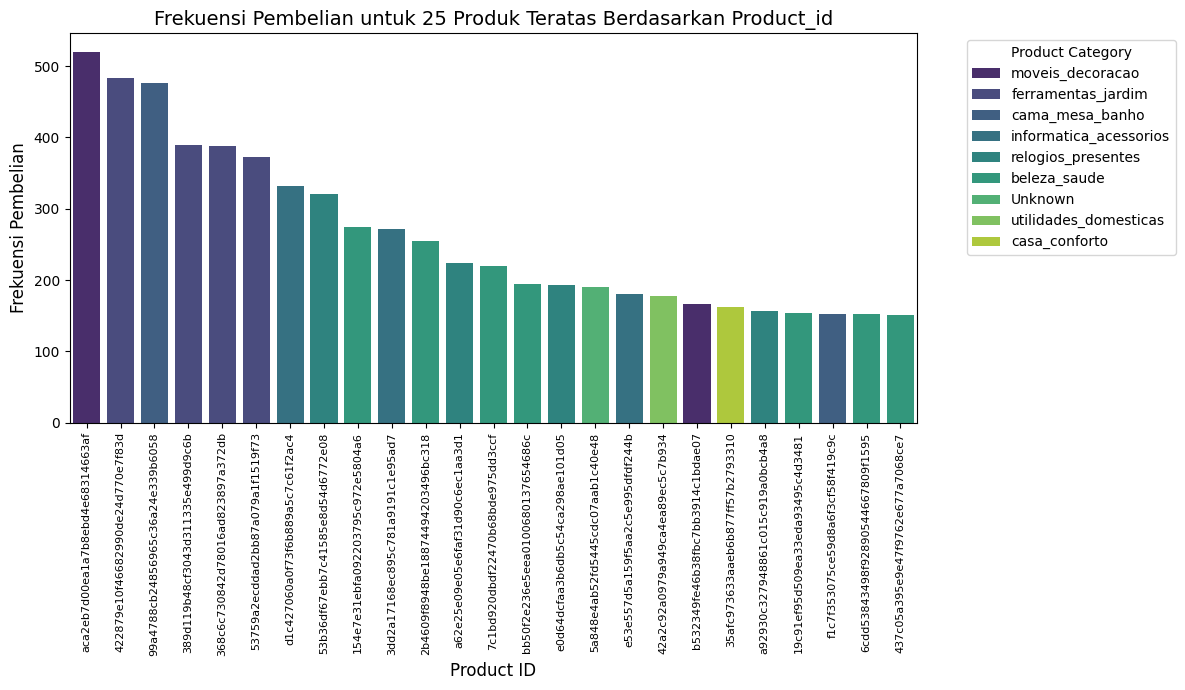

In [205]:
# Ambil 25 produk teratas berdasarkan Frekuensi Pembelian secara keseluruhan
top_25_products = freq_buyer.nlargest(25, 'Frekuensi Pembelian')

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_25_products,
    x='product_id',
    y='Frekuensi Pembelian',
    hue='product_category_name',
    dodge=False,
    palette='viridis'
)

# Atur tampilan
plt.title('Frekuensi Pembelian untuk 25 Produk Teratas Berdasarkan Product_id', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Frekuensi Pembelian', fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Rotasi untuk ID produk
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Kesimpulan :


Kita melakukan analisi terhadap frequensi belian berdasarkan product_id di dapatkan bahwa product_id yang masuk dalam kategori Movie Dekorasi memiliki frequensi pembelian tertinggi dan diikuti product_id pada kategori produk ferramentas_jardim (alat - alat taman) dan cama_mesa_banho (perlengkapan tidur, meja, dan perlengkapan mandi)

#### **C. Bagaimana Pola Waktu Pembelian ?**

C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\767613691.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_trend, x='Bulan', y='Jumlah Pembelian', ax=axes[0], palette='viridis')


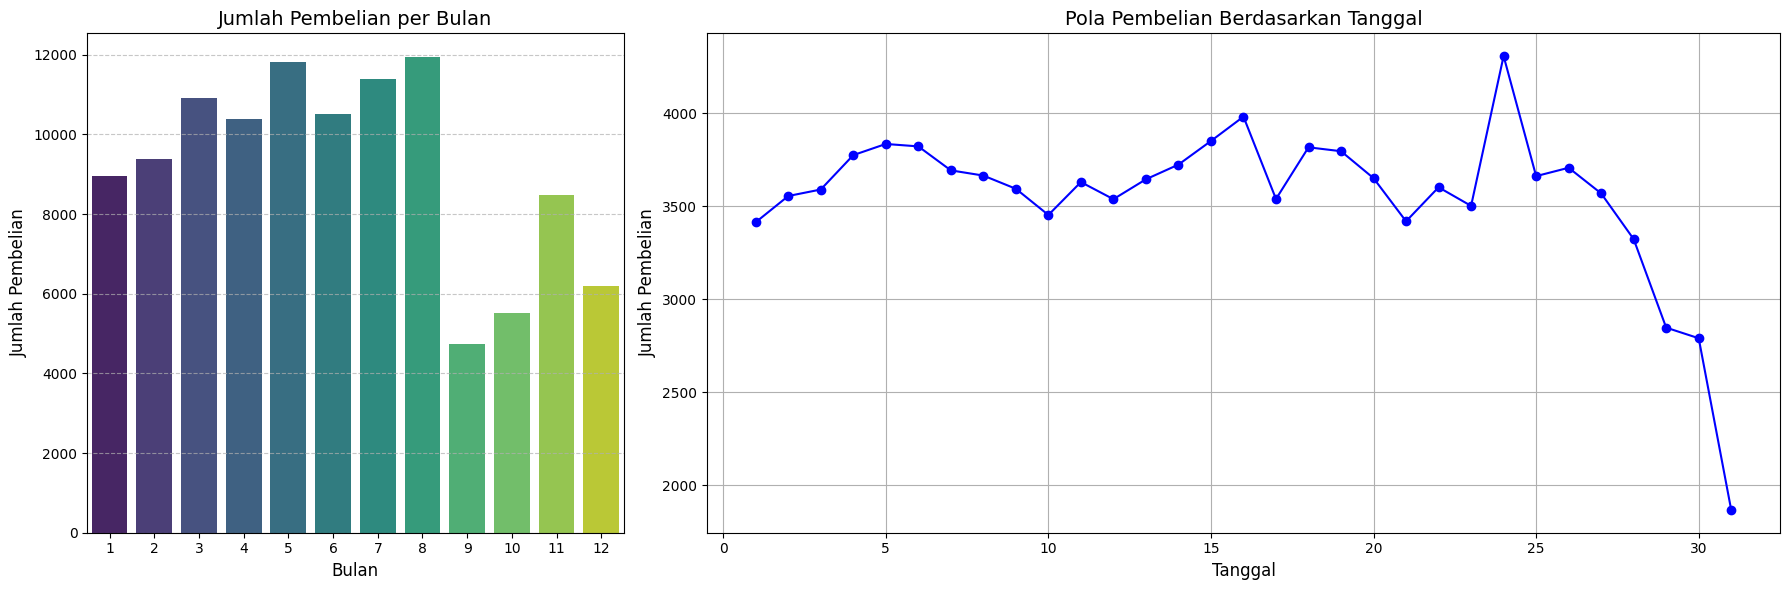

In [206]:
# --- Data untuk Bar Chart ---
# Kelompokkan berdasarkan bulan pembelian
monthly_trend = retensi_pembelian.groupby(retensi_pembelian['order_purchase_timestamp'].dt.month).agg({
    'order_id': 'count'
}).reset_index()
monthly_trend.columns = ['Bulan', 'Jumlah Pembelian']

# --- Data untuk Line Chart ---
daily_sales = retensi_pembelian.groupby('order_purchase_day').agg({'order_id': 'count'}).reset_index()
daily_sales.columns = ['Tanggal', 'Jumlah Pembelian']

# --- Visualisasi ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

# Bar Chart (Distribusi Bulanan)
sns.barplot(data=monthly_trend, x='Bulan', y='Jumlah Pembelian', ax=axes[0], palette='viridis')
axes[0].set_title('Jumlah Pembelian per Bulan', fontsize=14)
axes[0].set_xlabel('Bulan', fontsize=12)
axes[0].set_ylabel('Jumlah Pembelian', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Line Chart (Trend Harian)
axes[1].plot(daily_sales['Tanggal'], daily_sales['Jumlah Pembelian'], marker='o', linestyle='-', color='b')
axes[1].set_title('Pola Pembelian Berdasarkan Tanggal', fontsize=14)
axes[1].set_xlabel('Tanggal', fontsize=12)
axes[1].set_ylabel('Jumlah Pembelian', fontsize=12)
axes[1].grid(True)

# Layout Adjustment
plt.tight_layout()
plt.show()


<b> Kesimpulan : </b>
  1. Jumlah Pembelian per Bulan (Bar Chart):

    - Puncak Pembelian Bulanan:

      - Pembelian tertinggi terjadi pada bulan Juli dan Agustus, dengan jumlah pembelian mencapai sekitar 12.000.

      - Jumlah pembelian relatif tinggi dari bulan Maret hingga September, dengan penurunan yang signifikan mulai dari bulan Oktober hingga Desember.

  2. Pola Pembelian Berdasarkan Tanggal (Line Chart):

    - Puncak Pembelian Harian:

      - Pola harian menunjukkan fluktuasi dengan puncak sekitar tanggal 25 setiap bulan, mencapai sekitar 4.500 pembelian.

      - Tren umum menunjukkan peningkatan dari awal bulan, dengan puncak di pertengahan hingga akhir bulan.

<b> Waktu Puncak Pembelian: </b>


Puncak Bulanan: Bulan Juli dan Agustus menunjukkan aktivitas pembelian tertinggi. Ini bisa jadi waktu yang ideal untuk meluncurkan promosi atau kampanye pemasaran.

<b>Puncak Harian: </b>

Pembelian tertinggi terjadi sekitar tanggal 25 setiap bulan. Menyediakan penawaran khusus atau diskon pada tanggal tersebut dapat meningkatkan penjualan lebih lanjut.

## **Pertanyaan 2:**

### A. Product apasaja yang menghasilkan keuntungan tertinggi?

In [207]:
profit_product.head()

,product_category_name,Jumlah Produk,Total Profit
12,beleza_saude,9975,1297490.77
67,relogios_presentes,6201,1253143.30
14,cama_mesa_banho,11823,1092551.02
33,esporte_lazer,8945,1023996.34
45,informatica_acessorios,8082,942277.57


C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2815946137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


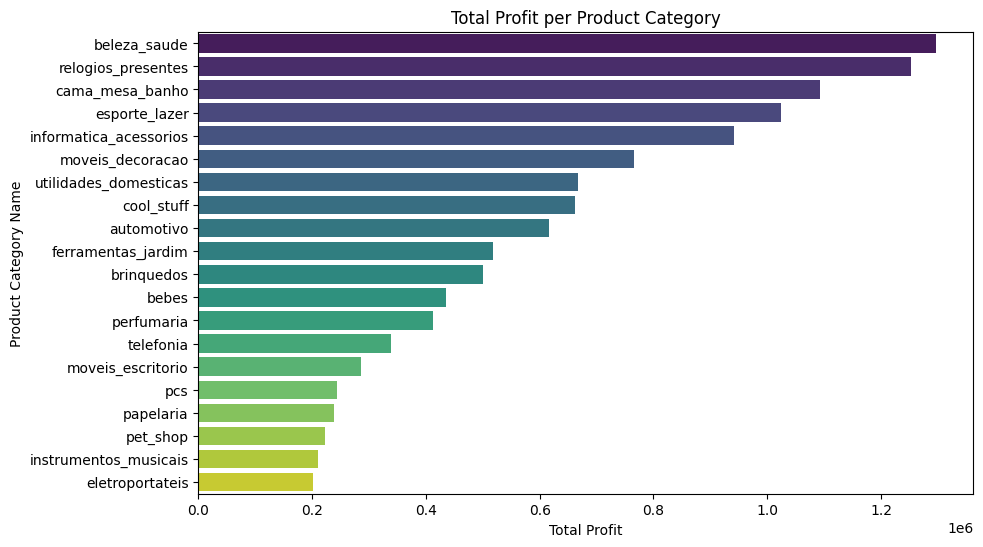

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=profit_product[0:20], x='Total Profit', y='product_category_name', palette='viridis'
    )
plt.xlabel('Total Profit')
plt.ylabel('Product Category Name')
plt.title('Total Profit per Product Category')
plt.show()

Pada chart diatas kita dapat melihat bahwa produk kecantikan (beleza_saude) memiliki kontribusi yang tertinggi dalam menyumbang pendapatan penjualan lalu diikuti jenis produk jam tangan (relogios_presentes).

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

Analisis RFM

In [209]:
customer_rfm.head()

,customer_unique_id,Jumlah Pemesanan,order_purchase_timestamp,total_spending,spending_category,recency
1,0a0a92112bd4c708ca5fde585afaa872,8,2017-09-29 15:24:52,13440.0,High,333
2,da122df9eeddfedc1dc1f5349a1a690c,2,2017-04-01 15:58:41,7388.0,High,514
3,763c8b1c9c68a0229c42c9fc6f662b93,4,2018-07-15 14:49:44,7160.0,High,45
4,dc4802a71eae9be1dd28f5d788ceb526,1,2017-02-12 20:37:36,6735.0,High,562
5,459bef486812aa25204be022145caa62,1,2018-07-25 18:10:17,6729.0,High,34


C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\1678485786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_rfm[0:15], x='customer_unique_id', y='recency', ax=axes[0], palette = 'viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\1678485786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_rfm[0:15], x='customer_unique_id', y='Jumlah Pemesanan', ax=axes[1], palette = 'viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\1678485786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_

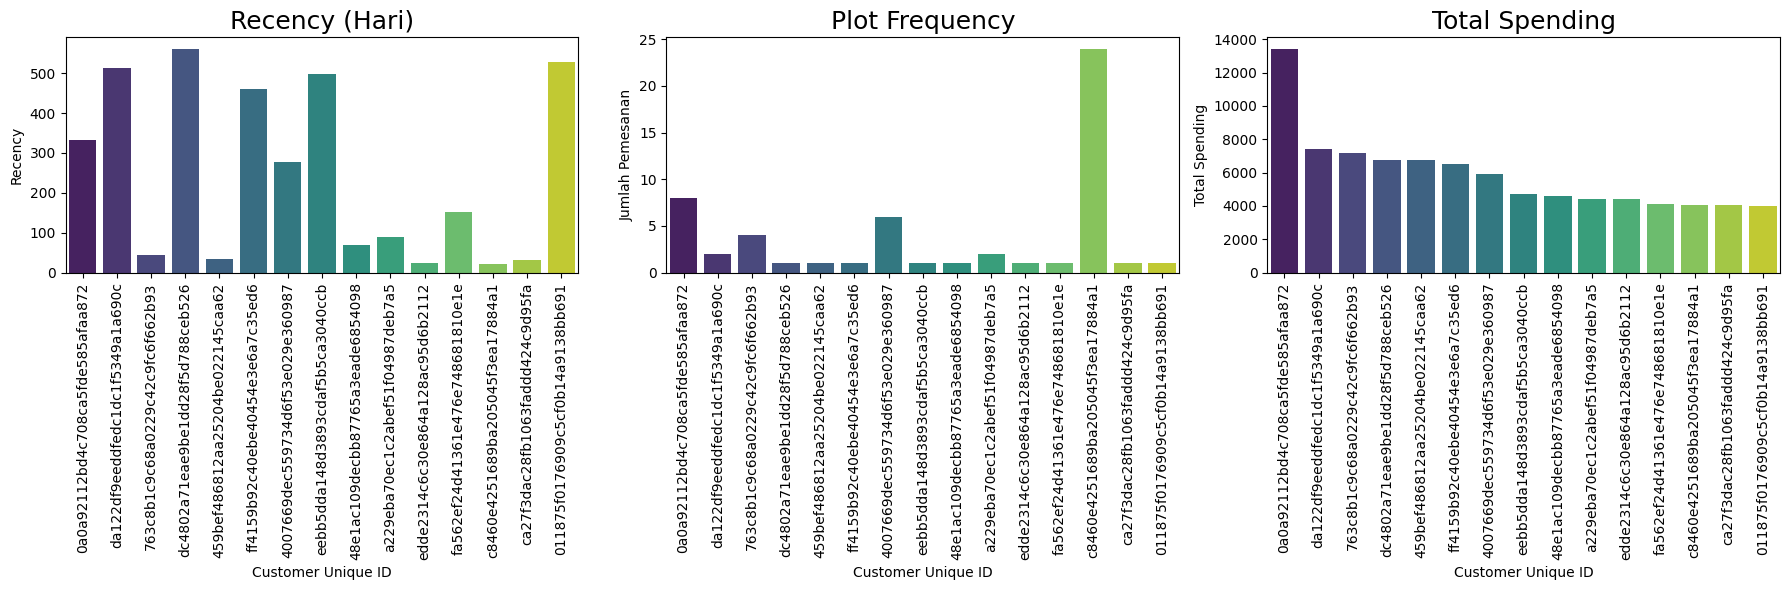

In [210]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)

sns.barplot(data=customer_rfm[0:15], x='customer_unique_id', y='recency', ax=axes[0], palette = 'viridis')
axes[0].set_ylabel('Recency')
axes[0].set_xlabel('Customer Unique ID')
axes[0].set_title("Recency (Hari)", fontsize=18)
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=customer_rfm[0:15], x='customer_unique_id', y='Jumlah Pemesanan', ax=axes[1], palette = 'viridis')
axes[1].set_ylabel('Jumlah Pemesanan')
axes[1].set_xlabel('Customer Unique ID')
axes[1].set_title("Plot Frequency", fontsize=18)
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(data=customer_rfm[0:15], x='customer_unique_id', y='total_spending', ax=axes[2], palette = 'viridis')
axes[2].set_ylabel('Total Spending')
axes[2].set_xlabel('Customer Unique ID')
axes[2].set_title("Total Spending", fontsize=18)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()



C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2092687225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_rfm, x='spending_category', y='total_spending', palette='viridis')


Text(0, 0.5, 'Total Spending')

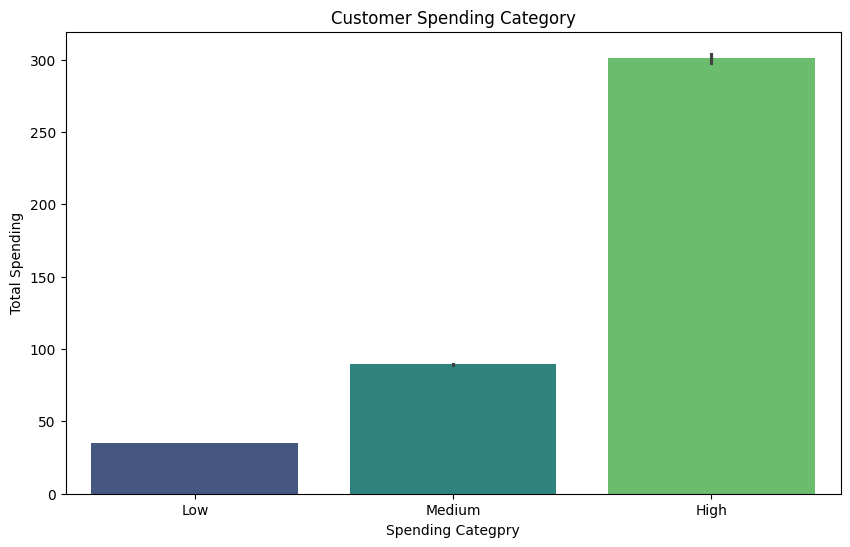

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_rfm, x='spending_category', y='total_spending', palette='viridis')
plt.title('Customer Spending Category')
plt.xlabel('Spending Categpry')
plt.ylabel('Total Spending')

In [212]:
customer_segment

,customer_segment,customer_unique_id
3,Pelanggan Teratas,934
2,Pelanggan Bernilai Tinggi,3993
1,Pelanggan Bernilai Sedang,25224
0,Pelanggan Bernilai Rendah,63205


C:\Users\Asus\AppData\Local\Temp\ipykernel_8824\2476672116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = customer_segment, x = 'customer_segment', y = 'customer_unique_id', palette = 'viridis')


Text(0, 0.5, 'Customer Unique ID')

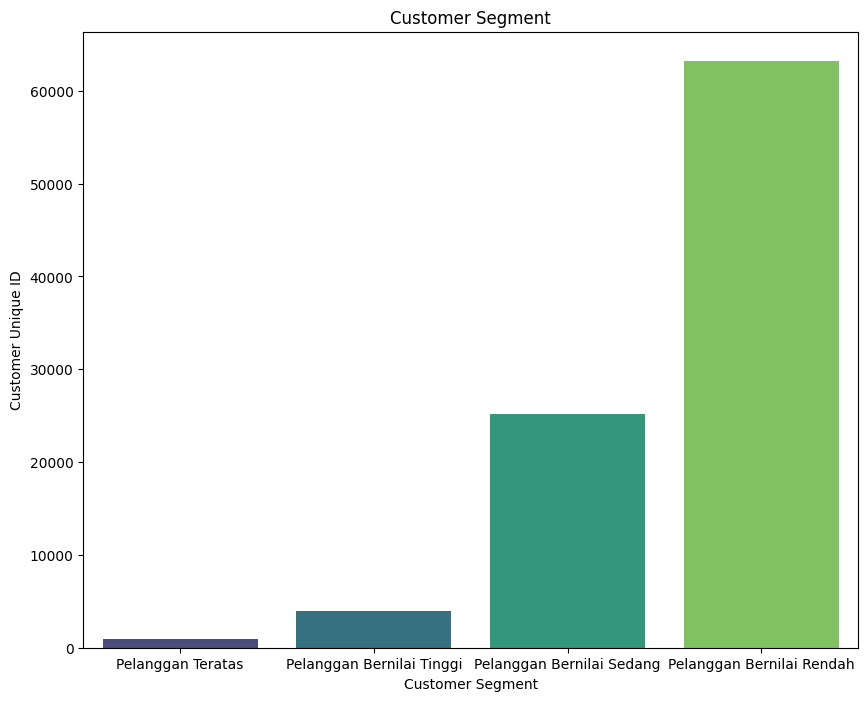

In [213]:
plt.figure(figsize = (10,8))
sns.barplot(data = customer_segment, x = 'customer_segment', y = 'customer_unique_id', palette = 'viridis')
plt.title('Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Unique ID')

# Conclusion


1. <h3>Bagaimana pola pembelian pelanggan? </h3>
   
   <h4>A. Kategori Produk apa yang paling populer dengan jumlah pemesanan terbanyak?</h4>


   <b>Jawab :</b>

   Barchart diatas merupakan visualisasi yang kita dapatkan terkait kategori product apa yang paling populer berdasarkan banyaknya pemesanan. Kita hanya mengabil 10 teratas dari 74 kategori product yang kita miliki.
            
            
     Hasil di atas kita dapat simpulkan bahwa :
            
       (1). Kategori Produk Terpopuler:
            
                cama_mesa_banho (Perlengkapan Tidur, Meja, dan Mandi): Ini adalah kategori produk yang paling populer dengan jumlah penjualan tertinggi. Popularitas kategori ini menunjukkan permintaan yang kuat untuk produk-produk rumah tangga yang berhubungan dengan kenyamanan dan dekorasi interior.
            
       (2). Kategori Lain yang Juga Populer:
            
                beleza_saude (Kecantikan dan Kesehatan): Kategori ini berada di urutan kedua. Produk dalam kategori ini kemungkinan besar terkait dengan perawatan pribadi dan kesehatan, menunjukkan tren yang positif dalam konsumsi barang-barang kesehatan dan kecantikan.
            
                esporte_lazer (Olahraga dan Rekreasi): Berada di posisi ketiga, ini menunjukkan bahwa produk-produk terkait olahraga dan kegiatan rekreasi juga sangat diminati.
            
       (3). Kategori Produk yang Perlu Diperhatikan:
            
                moveis_decoracao (Furniture dan Dekorasi) dan informatica_acessorios (Aksesori Komputer): Kedua kategori ini memiliki jumlah penjualan yang cukup tinggi, menandakan bahwa mereka adalah segmen yang penting untuk diperhatikan dalam strategi penjualan dan pemasaran.
            
                utilidades_domesticas (Peralatan Rumah Tangga) dan relogios_presentes (Jam Tangan dan Hadiah): Kategori ini juga menunjukkan performa penjualan yang baik, berpotensi untuk menjadi fokus dalam kampanye promosi mendatang.
            
       (4). Kategori dengan Penjualan Terendah di Top 10:
            
                automotivo (Otomotif): Meskipun berada di urutan kesepuluh dalam daftar ini, penjualan produk dalam kategori ini masih signifikan. Ini menunjukkan ada minat yang substansial pada produk-produk otomotif.






 <h4>B. Product apa saja yang sering di beli berdasarkan frekuensi pembelian? </h4>

   <b> Jawab : </b>

       Kita melakukan analisi terhadap frequensi belian berdasarkan product_id di dapatkan bahwa product_id yang masuk dalam kategori Movie Dekorasi memiliki frequensi pembelian tertinggi dan diikuti product_id pada kategori produk ferramentas_jardim (alat - alat taman) dan cama_mesa_banho (perlengkapan tidur, meja, dan perlengkapan mandi). 
   


 <h4>c. Bagaimana pola waktu pembelian? </h4>

   <b> Jawab : </b>

1. Jumlah Pembelian per Bulan (Bar Chart):

    - Puncak Pembelian Bulanan:

      - Pembelian tertinggi terjadi pada bulan Juli dan Agustus, dengan jumlah pembelian mencapai sekitar 12.000.

      - Jumlah pembelian relatif tinggi dari bulan Maret hingga September, dengan penurunan yang signifikan mulai dari bulan Oktober hingga Desember.

  2. Pola Pembelian Berdasarkan Tanggal (Line Chart):

    - Puncak Pembelian Harian:

      - Pola harian menunjukkan fluktuasi dengan puncak sekitar tanggal 25 setiap bulan, mencapai sekitar 4.500 pembelian.

      - Tren umum menunjukkan peningkatan dari awal bulan, dengan puncak di pertengahan hingga akhir bulan.

<b> Waktu Puncak Pembelian: </b>


Puncak Bulanan: Bulan Juli dan Agustus menunjukkan aktivitas pembelian tertinggi. Ini bisa jadi waktu yang ideal untuk meluncurkan promosi atau kampanye pemasaran.

<b>Puncak Harian: </b>

Pembelian tertinggi terjadi sekitar tanggal 25 setiap bulan. Menyediakan penawaran khusus atau diskon pada tanggal tersebut dapat meningkatkan penjualan lebih lanjut.
   

3. Produk apa saja yang memberikan keuntungan tertinggi?
 

4. Wilayah Mana saja yang memiliki tingkat penjualan tertinggi?
    

5. RFM Analisis


<h3>3. Produk apa saja yang memberikan keuntungan tertinggi? </h3>
    <b>jawab : </b>

1. Kategori dengan Jumlah Produk Tertinggi:

    - cama_mesa_banho memiliki jumlah produk terbanyak, yaitu 11,823.
    - Kategori ini menyumbang profit sebesar 1,092,551.02.


2. Kategori dengan Total Profit Tertinggi:

    - beleza_saude menghasilkan total profit tertinggi sebesar 1,297,490.77, meskipun jumlah produknya lebih sedikit dibandingkan cama_mesa_banho.


3. Kategori dengan Profit per Produk yang Tinggi:

    - relogios_presentes memiliki jumlah produk yang relatif rendah (6,201) tetapi menghasilkan profit yang hampir sama dengan beleza_saude (1,253,143.30). Ini menunjukkan profitabilitas per produk yang tinggi.


4. Kategori dengan Performa Rata-rata:

    - esporte_lazer dan informatica_acessorios memiliki jumlah produk dan total profit yang cukup besar, tetapi lebih rendah dibandingkan kategori lainnya.
    - esporte_lazer menghasilkan profit sebesar 1,023,996.34 dengan 8,945 produk, sedangkan informatica_acessorios menghasilkan 942,277.57 dari 8,082 produk.
 

<h3>4. RFM Analisis </h3>
    <b>Jawab : </b> 

Berdasarkan website geeksforgeeks.org rumus dari RFM adalah (0.15 * recency) + (0.28 * frekuensi) + (0.57 * monetery) kita mendapatkan hasil sebagai berikut :

Distribusi Pelanggan:

1. Pelanggan Bernilai Rendah (63,205 pelanggan):
    - Sebagian besar pelanggan termasuk dalam kategori ini, menunjukkan bahwa mereka memiliki tingkat recency, frequency, dan monetary yang rendah.
    - Pelanggan ini mungkin kurang loyal atau jarang melakukan transaksi.
2. Pelanggan Bernilai Sedang (25,224 pelanggan):
    - Kelompok ini adalah pelanggan yang memiliki keterlibatan sedang dalam hal frekuensi pembelian atau nilai transaksi.
    - Mereka memiliki potensi untuk ditingkatkan ke kategori bernilai tinggi dengan strategi yang tepat.
3. Pelanggan Bernilai Tinggi (3,993 pelanggan):
    - Pelanggan ini adalah kontributor signifikan terhadap pendapatan karena memiliki nilai transaksi (monetary) yang tinggi, membeli lebih sering, dan relatif baru melakukan transaksi.
4. Pelanggan Teratas (934 pelanggan):
    - Pelanggan ini adalah yang paling berharga dan setia, dengan nilai RFM tertinggi. Mereka merupakan pelanggan prioritas yang perlu dijaga.

<b>kesimpulan : </b>

    Dengan mayoritas pelanggan berada di kategori rendah dan sedang, fokus utama perusahaan adalah meningkatkan nilai pelanggan di kategori tersebut. Sementara itu, pelanggan bernilai tinggi dan teratas harus dipertahankan sebagai aset utama perusahaan untuk memastikan pendapatan yang stabil.

In [214]:
# from google.colab import drive
# drive.mount('/content/drive')

In [215]:
# Pastikan folder tujuan ada di Google Drive
# folder_path = '/content/drive/My Drive/Cust_city'
# os.makedirs(folder_path, exist_ok=True)
# cust_city.to_csv(r'D:\github dokumen\Project_dicoding\Streamlit\cust_city.csv', index=False)

# # Simpan file ke Google Drive
# populer_product.to_csv(f'{folder_path}/populer_product.csv', index=True)
# freq_buyer.to_csv(f'{folder_path}/freq_buyer.csv', index=True)
# retensi_pembelian.to_csv(f'{folder_path}/retensi_pembelian.csv', index=True)
# profit_product.to_csv(f'{folder_path}/profit_product.csv', index=True)
# cust_city.to_csv(f'{folder_path}/cust_city.csv', index=True)
#

# print("File berhasil disimpan di Google Drive.")

In [216]:


# folder_path = r'D:\\github dokumen\\Project_dicoding\\Streamlit'
# if not os.path.exists(folder_path):
#     print(f"Folder tidak ditemukan: {folder_path}")
# else:
#     print(f"Folder ditemukan: {folder_path}")


In [217]:
# from google.colab import drive
# import os

# # Hubungkan Google Colab dengan Google Drive
# drive.mount('/content/drive')

# # Pastikan folder tujuan ada di Google Drive
# folder_path = '/content/drive/My Drive/Project_dicoding/Streamlit'
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)  # Membuat folder jika belum ada

# print(f"Folder tujuan: {folder_path}")


In [218]:
# # Simpan file hasil analisis
# file_path = os.path.join(folder_path, 'cust_city.csv')
# cust_city.to_csv(file_path, index=False)
# customer_rfm.to_csv(file_path, index=False)
# customer_segment.to_csv(file_path, index = False)
# print(f"File berhasil disimpan di: {file_path}")

In [219]:
# # Simpan file sementara di runtime Colab
# cust_city.to_csv('cust_city.csv', index=False)
# customer_rfm.to_csv('customer_rfm.csv', index = False)
# customer_segment.to_csv('customer_segment.csv', index = False)

# # Unduh file
# from google.colab import files
# files.download('cust_city.csv')
# files.download('customer_rfm.csv')
# files.download('customer_segment.csv')
# print("File berhasil diunduh.")